### Decision tree for classification

The advantage of trees compared to linear techniques is that they are able to capture non-linear relationships between features & labels.
Their objective is to infer labels of unlabeled data.

- Pre-processing

In [194]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/_data/'
os.chdir(path)

df = pd.read_csv('breastcancer.csv')

response = ['diagnosis']
expla = ['radius_mean','concave points_mean']

X = df.loc[:, expla]
#y = df.loc[:, response]

y = df['diagnosis']
y = y.map({'M':1, 'B':0})

print(df_reduced.head(n=10))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


  diagnosis  radius_mean  concave points_mean
0         M        17.99              0.14710
1         M        20.57              0.07017
2         M        19.69              0.12790
3         M        11.42              0.10520
4         M        20.29              0.10430
5         M        12.45              0.08089
6         M        18.25              0.07400
7         M        13.71              0.05985
8         M        13.00              0.09353
9         M        12.46              0.08543


In [195]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

SEED = 1

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 1 0 0]


You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

### Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

In [196]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


Using only two features, your tree was able to achieve an accuracy of 89%!

### Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

In [197]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


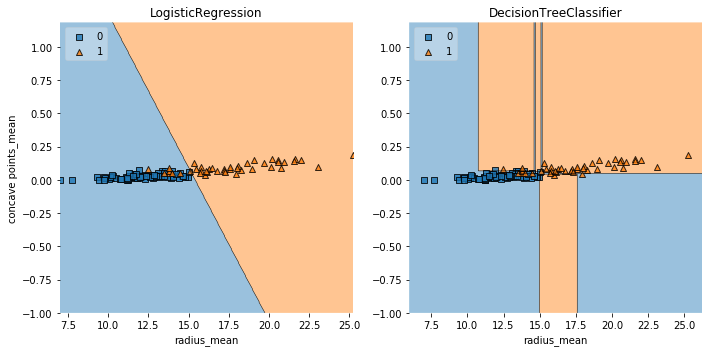

In [198]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

In [199]:
wbc = pd.read_csv('wbc.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [200]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

[1 0 0 1 0]
Test set accuracy: 0.89


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


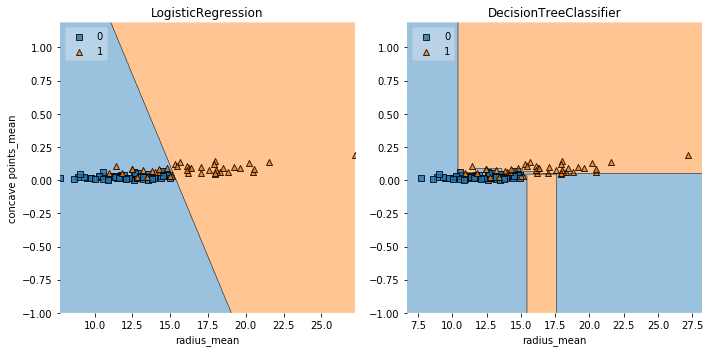

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

## Classification tree Learning
- Building Blocks of a Decision-Tree
    - Decision-Tree: data structure consisting of a hierarchy of nodes
    - Node: question or prediction
    - Three kinds of nodes
        - **Root**: no parent node, question giving rise to two children nodes.
        - **Internal node**: one parent node, question giving rise to two children nodes.
        - **Leaf**: one parent node, no children nodes --> prediction.
- Information Gain (IG)
![information gain](./image/ig.png)
$$ IG(\underbrace{f}_{\text{feature}}, \underbrace{sp}_{\text{split-point}} ) = I(\text{parent}) - \big( \frac{N_{\text{left}}}{N}I(\text{left}) + \frac{N_{\text{right}}}{N}I(\text{right})  \big) $$
    - Criteria to measure the impurity of a note $I(\text{node})$:
        - gini index
        - entropy
        - etc...
- Classification-Tree Learning
    - Nodes are grown recursively.
    - At each node, split the data based on:
        - feature $f$ and split-point $sp$ to maximize $IG(\text{node})$.
        - If $IG(\text{node}) = 0$, declare the node a leaf

### Using entropy as a criterion
In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.



In [202]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named ```dt_gini```. The tree ```dt_gini``` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword ```'gini'```.

In [203]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [204]:
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using gini:  0.8859649122807017


Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

## Decision tree for regression
- Information Criterion for Regression Tree
$$ I(\text{node}) = \underbrace{\text{MSE}(\text{node})}_{\text{mean-squared-error}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}} \big(y^{(i)} - \hat{y}_{\text{node}}  \big)^2 $$
$$ \underbrace{\hat{y}_{\text{node}}}_{\text{mean-target-value}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}}y^{(i)}$$
- Prediction
$$ \hat{y}_{\text{pred}}(\text{leaf}) = \dfrac{1}{N_{\text{leaf}}} \sum_{i \in \text{leaf}} y^{(i)}$$

### Train your first regression tree
In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) using all the six available features.



In [205]:
mpg = pd.read_csv('auto.csv')
mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [206]:
mpg = pd.get_dummies(mpg)

In [207]:
mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [208]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [210]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

### Evaluate the regression tree
In this exercise, you will evaluate the test set performance of ```dt``` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).



In [211]:
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


### Linear regression vs regression tree
In this exercise, you'll compare the test set RMSE of ```dt``` to that achieved by a linear regression model. We have already instantiated a linear regression model ```lr``` and trained it on the same dataset as ```dt```.



In [212]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


### The Bias-Variance Tradeoff

Difficulties in modeling :
1. Over-fitting : when the model fits the noise from the training set.

High test-set error, low training-set error. Typical over-fitting.

2. Under-fitting : when the model is not flexible enough to approximate new unseen data.

Training set error roughly equal to the one of the test set, but both errors are high relatively.
Complex dependency is not capture.


Generalization Error tells us how well does a model fits onto unseen data. It drives us to find a balance between bias and variance.

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generalization Error
- Supervised Learning - Under the Hood
    - supervised learning: $y = f(x)$, $f$ is unknown.
    - Goals
        - Find a model $\hat{f}$ that best approximates: $f: \hat{f} \approx f$
        - $\hat{f}$ can be Logistic Regression, Decision Tree, Neural Network,...
        - Discard noise as much as possible
        - **End goal**: $\hat{f}$ should achieve a low predictive error on unseen datasets.
- Difficulties in Approximating $f$
    - Overfitting: $\hat{f}(x)$ fits the training set noise.
    - Underfitting: $\hat{f}$ is not flexible enough to approximate $f$.
- Generalization Error
    - Generalization Error of $\hat{f}$: Does $\hat{f}$ generalize well on unseen data?
    - It can be decomposed as follows:
    $$ \hat{f} = \text{bias}^2 + \text{variance} +\text{irreducible error} $$
    - Bias: error term that tells you, on average, how much $\hat{f} \neq f$.
![bias](image/bias.png)
    - Variance: tells you how much $\hat{f}$ is inconsistent over different training sets
![variance](image/variance.png)
- Model Complexity
    - Model Complexity: sets the flexibility of $\hat{f}$
    - Example: Maximum tree depth, Minimum samples per leaf, ...
- Bias-Variance Tradeoff
![](image/ge.png)

### Diagnose bias and variance problems
- Estimating the Generalization Error
    - How do we estimate the generalization error of a model?
        - Cannot be done directly because:
            - $f$ is unknown
            - usually you only have one dataset
            - noise is unpredictable.
    - Solution
        - Split the data to training and test sets
        - fit $\hat{f}$ to the training set
        - evaluate the error of $\hat{f}$ on the unseen test set
        - generalization error of $\hat{f} \approx$ test set error of $\hat{f}$
- Better model Evaluation with Cross-Validation
    - Test set should not be touched until we are confident about $\hat{f}$'s performance
    - Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen all training points
    - Solution: Cross-Validation (CV)
        - K-Fold CV
        - Hold-Out CV
- K-Fold CV
    $$\text{CV error} = \dfrac{E_1 + \cdots + E_{10}}{10} $$
- Diagnose Variance Problems
    - If $\hat{f}$ suffers from **high variance**: CV error of $\hat{f} >$ training set error of $\hat{f}$
        - $\hat{f}$ is said to overfit the training set. To remedy overfitting:
            - Decrease model complexity
            - Gather more data, ...
- Diagnose Bias Problems
    - if $\hat{f}$ suffers from high bias: CV error of $\hat{f} \approx$ training set error of $\hat{f} >>$ desired error.
    - $\hat{f}$ is said to underfit the training set. To remedy underfitting:
        - Increase model complexity
        - Gather more relevant features

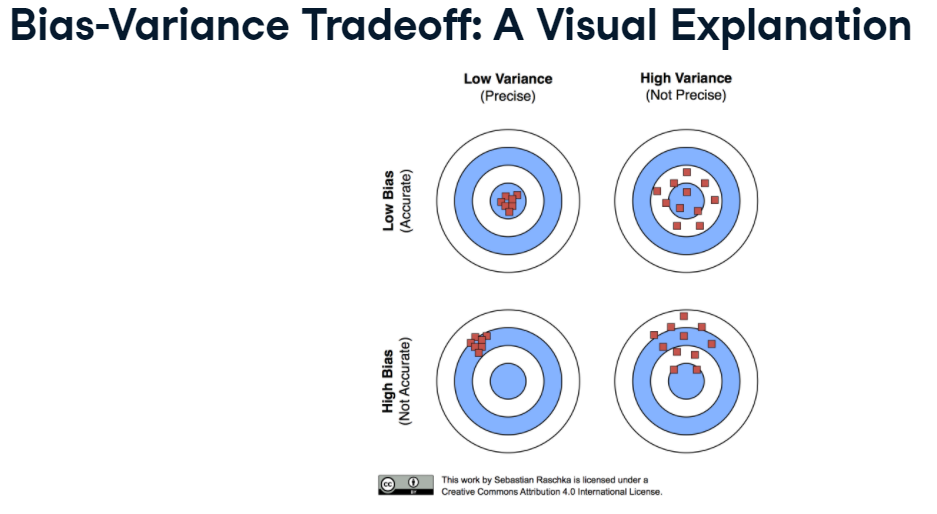

In [215]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/bias-variance-tradeoff.png")

![title](bias-variance-tradeoff.png)

### Instantiate the model
In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

Complexity, bias and variance
In the video, you saw how the complexity of a model labeled 
 influences the bias and variance terms of its generalization error.
Which of the following correctly describes the relationship between 
's complexity and 
's bias and variance terms?

As the complexity of 
 increases, the bias term decreases while the variance term increases.
press

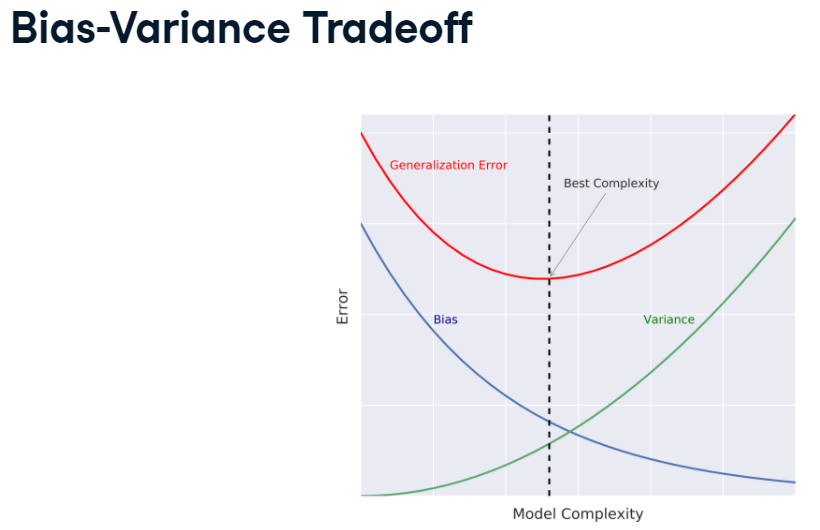

In [216]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/bias-variance-tradeoff2.png")

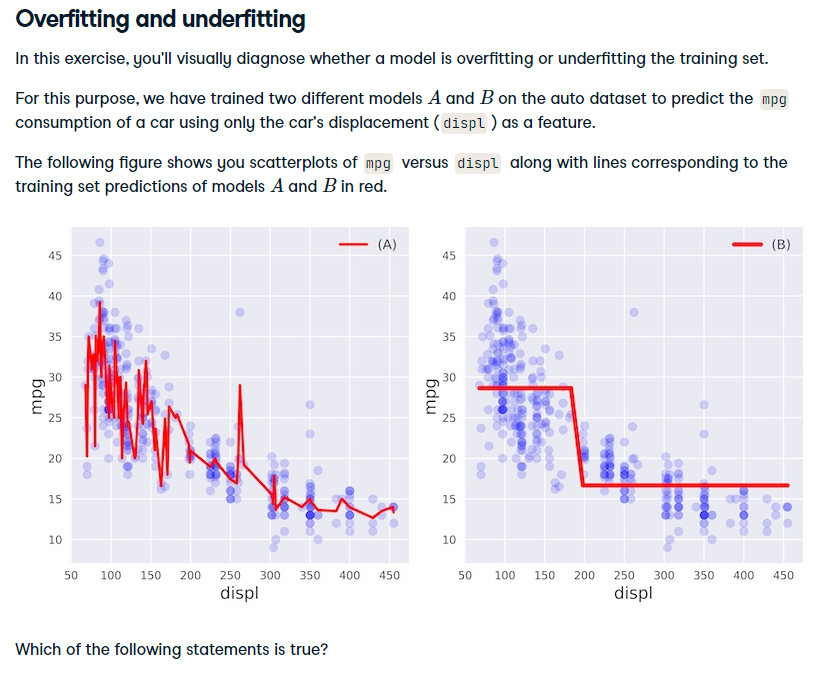

In [217]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/bias-variance-tradeoff3.png")

 B suffers from high bias and underfits the training set.
 A suffers from high variance and overfits the training set.
 Model B is not able to capture the nonlinear dependence of mpg on displ.

### Diagnose bias and variance problems

How do we estimate the generalization error of a model ?
Cannot be done directly because the test data is unknown, we have one dataset generally, and noise is unpredictable/random.
Solution : split data into train/test sets then cross-validation (k-fold / hold-out).

1. Variance problems.
High variance often means over-fitting = to remedy, need to reduce model complexity, decrease max depth, increase min samples per leaf, gather more data etc.

2. Bias problems.
Bias often means under-fitting = to remedy, increase model complexity, increase max depth, decrease min samples per left, gather more features to resume the problem etc.

### Diagnose bias and variance problems
- Estimating the Generalization Error
    - How do we estimate the generalization error of a model?
        - Cannot be done directly because:
            - $f$ is unknown
            - usually you only have one dataset
            - noise is unpredictable.
    - Solution
        - Split the data to training and test sets
        - fit $\hat{f}$ to the training set
        - evaluate the error of $\hat{f}$ on the unseen test set
        - generalization error of $\hat{f} \approx$ test set error of $\hat{f}$
- Better model Evaluation with Cross-Validation
    - Test set should not be touched until we are confident about $\hat{f}$'s performance
    - Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen all training points
    - Solution: Cross-Validation (CV)
        - K-Fold CV
        - Hold-Out CV
- K-Fold CV
    $$\text{CV error} = \dfrac{E_1 + \cdots + E_{10}}{10} $$
- Diagnose Variance Problems
    - If $\hat{f}$ suffers from **high variance**: CV error of $\hat{f} >$ training set error of $\hat{f}$
        - $\hat{f}$ is said to overfit the training set. To remedy overfitting:
            - Decrease model complexity
            - Gather more data, ...
- Diagnose Bias Problems
    - if $\hat{f}$ suffers from high bias: CV error of $\hat{f} \approx$ training set error of $\hat{f} >>$ desired error.
    - $\hat{f}$ is said to underfit the training set. To remedy underfitting:
        - Increase model complexity
        - Gather more relevant features

### Instantiate the model
In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

In [218]:
mpg = pd.read_csv('auto.csv')
mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [219]:
mpg = pd.get_dummies(mpg)
mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [220]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

### Evaluate the 10-fold CV error
In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree ```dt``` that you instantiated in the previous exercise.

Note that since ```cross_val_score``` has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

In [222]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                 scoring='neg_mean_squared_error', n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean()) ** 0.5

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

### Evaluate the training error
You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

Note that in scikit-learn, the MSE of a model can be computed as follows:
```python
MSE_model = mean_squared_error(y_true, y_predicted)
```
where we use the function mean_squared_error from the ```metrics``` module and pass it the true labels ```y_true``` as a first argument, and the predicted labels from the model ```y_predicted``` as a second argument.

In [223]:
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train)) ** 0.5

# Print RMSE_train
print("Train RMSE: {:.2f}".format(RMSE_train))

Train RMSE: 5.15


Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.

dt suffers from high bias because RMSE_CV  RMSE_train and both scores are greater than baseline_RMSE.

### Ensemble Learning
- Advantages of CARTs
    - Simple to understand
    - Simple to interpret
    - Easy to use
    - Flexibility: ability to describe non-linear dependencies.
    - Preprocessing: no need to standardize or normalize features.
- Limitations of CARTs
    - Classification: can only produce orthogonal decision boundaries
    - Sensitive to small variations in the training set
    - High variance: unconstrained CARTs may overfit the training set
    - Solution: **ensemble learning**
- Ensemble Learning
    - Train different models on the same dataset.
    - Let each model make its predictions
    - Meta-Model: aggregates predictionsof individual models
    - Final prediction: more robust and less prone to errors
    - Best results: models are skillfull in different ways.
![ensemble](image/ensemble.png)

### Define the ensemble
In the following set of exercises, you'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

- Pre-processing

In [224]:
indian = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [225]:
X = indian.drop('Liver_disease', axis='columns')
y = indian['Liver_disease']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# Set seed for reproducibility
SEED = 1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbors', knn),
    ('Classification Tree', dt)
]
print(classifiers)

[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('K Nearest Neighbors', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=27, p=2,
           weights='uniform')), ('Classification Tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'))]


In [228]:
from sklearn.metrics import accuracy_score

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbors : 0.701
Classification Tree : 0.730


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Notice how Logistic Regression achieved the highest accuracy of 76.4%.

### Better performance with a Voting Classifier
Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

REMEMBER : voting classifier means using different algorithms on the same training dataset; it is not the same as bagging.

In [229]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Notice how the voting classifier achieves a test set accuracy of 77%. This value is greater than that achieved by LogisticRegression.

### Bagging and Random Forests
> A Summary of lecture "Machine Learning with Tree-Based Models in Python
", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/feature_importances.png

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bagging
- Ensemble Methods
    - Voting Classifier
        - same training set,
        - $\neq$ algortihms
    - Bagging
        - One algorithm
        - $\neq$ subsets of the training set
- Bagging
    - Bootstrap Aggregation
    - Uses a technique known as the bootstrap
    - Reduces variance of individual models in the ensemble
_ Bootstrap
![bootstrap](image/bootstrap.png)
- Bootstrap-training
![training](image/bs_training.png)
- Bootstrap-predict
![predict](image/bs_predict.png)

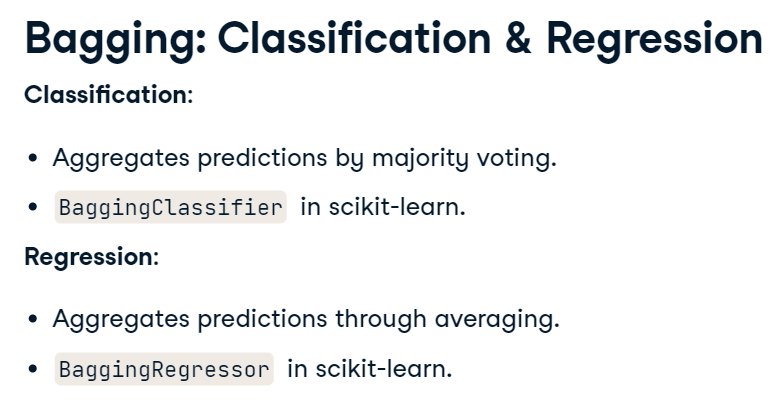

In [235]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/bagging1.png")

### Define the bagging classifier
In the following exercises you'll work with the [Indian Liver Patient dataset](https://www.kaggle.com/uciml/indian-liver-patient-records) from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.



- Preprocess

In [236]:
indian = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [244]:
X = indian.drop('Liver_disease', axis=1)
y = indian['Liver_disease']

In [245]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc (estimator is the decision tree, and we do 50 trees)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

### Evaluate Bagging performance
Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.



In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.71


A single tree dt would have achieved an accuracy of 63% which is 8% lower than bc's accuracy!

### Out of Bag Evaluation (OOB are the obs left after a bootstrap selects its own observations using training data)
- Bagging
    - Some instances may be sampled several times for one model, other instances may not be sampled at all.
- Out Of Bag (OOB) instances
    - On average, for each model, 63% of the training instances are sampled
    - The remaining 37% constitute the OOB instances
- OOB Evaluation
![oob](image/oob.png)
    

### Prepare the ground
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter ```oob_score``` to ```True``` during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the ```.oob_score_``` attribute from the corresponding instance.



In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=1)

### OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.



In [250]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.700


The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

## Random Forests (RF)
- Bagging
    - Base estimator: Decision Tree, Logistic Regression, Neural Network, ...
    - Each estimator is trained on a distinct bootstrap sample of the training set
    - Estimators use all features for training and prediction
- Further Diversity with Random Forest
    - Base estimator: Decision Tree
    - Each estimator is trained on a different bootstrap sample having the same size as the training set
    - RF introduces further randomization in the training of individual trees
    - $d$ features are sampled at each node without replacement
    $$ d < \text{total number of features} $$
- Random Forest: Training
![rf_training](image/rf_training.png)
- Random Forest: Prediction
![rf_predict](image/rf_prediction.png)
- Feature importance
    - Tree based methods: enable measuring the importance of each feature in prediction
    

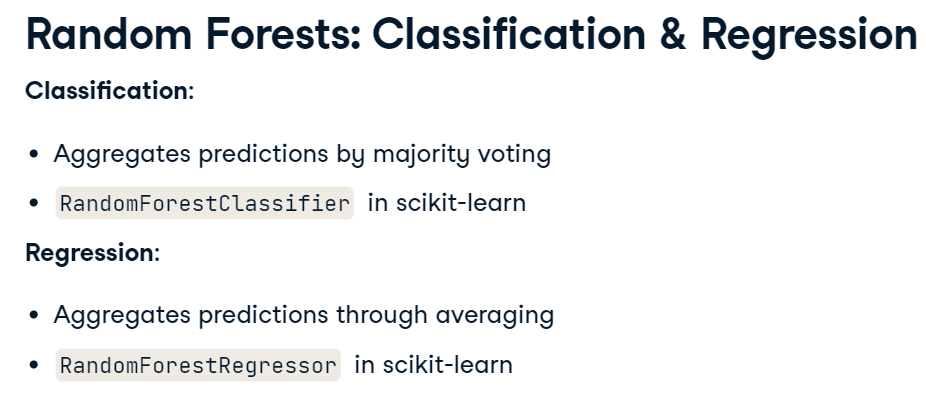

In [258]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/RF1.png")

### Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

- Preprocess

In [251]:
bike = pd.read_csv('bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [252]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [259]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf (25 trees)
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

### Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor ```rf``` that you trained in the previous exercise.

In [255]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** 0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

### Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor ```rf``` that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by ```rf```. Fortunately, this can be done easily thanks to plotting capabilities of ```pandas```.

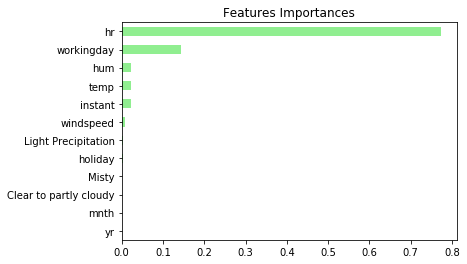

In [257]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.savefig('feature_importances.png')

Apparently, ```hr``` and ```workingday``` are the most important features according to ```rf```. The importances of these two features add up to more than 90%!

# Boosting
> A Summary of lecture "Machine Learning with Tree-Based Models in Python
", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/sgb_train.png

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Adaboost
- Boosting: Ensemble method combining several weak learners to form a strong learner.
    - Weak learner: Model doing slightly better than random guessing
        - E.g., Dicision stump (CART whose maximum depth is 1)
    - Train an ensemble of predictors sequentially.
    - Each predictor tries to correct its predecessor
    - Most popular boosting methods:
        - AdaBoost
        - Gradient Boosting
- AdaBoost
    - Stands for **Ada**ptive **Boost**ing
    - Each predictor pays more attention to the instances wrongly predicted by its predecessor.
    - Achieved by changing the weights of training instances.
    - Each predictor is assigned a coefficient $\alpha$ that depends on the predictor's training error
- AdaBoost: Training
![adaboost_train](image/adaboost_train.png)
    - Learning rate: $0 < \eta < 1$

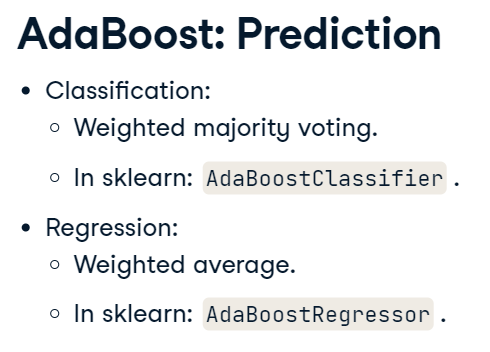

In [278]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/Ada1.png")

### Define the AdaBoost classifier
In the following exercises you'll revisit the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.

- Preprocess

In [261]:
indian = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [262]:
X = indian.drop('Liver_disease', axis='columns')
y = indian['Liver_disease']

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

### Train the AdaBoost classifier
Now that you've instantiated the AdaBoost classifier ada, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ```ada``` is trained, call the ```.predict_proba()``` method by passing ```X_test``` as a parameter and extract these probabilities by slicing all the values in the second column as follows:
```python
ada.predict_proba(X_test)[:,1]
```



In [266]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:, 1]

### Evaluate the AdaBoost classifier
Now that you're done training ```ada``` and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ```ada```'s ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the ```roc_auc_score()``` function from ```sklearn.metrics```.

In [267]:
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.63


This untuned AdaBoost classifier achieved a ROC AUC score of 0.71!

## Gradient Boosting (GB)
- Gradient Boosted Trees
    - Sequential correction of predecessor's errors
    - Does not tweak the weights of training instances
    - Fit each predictor is trained using its predecessor's residual errors as labels
    - Gradient Boosted Trees: a CART is used as a base learner.
- Gradient Boosted Trees for Regression: Training
![gb_train](image/gb_train.png)
    - $\eta$ (shrinkage)
        - Ensemble is shrinked after it is multiplied by a learning rate

### Define the GB regressor
You'll now revisit the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

- Preprocess

In [268]:
bike = pd.read_csv('bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [269]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [271]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)

### Train the GB regressor
You'll now train the gradient boosting regressor ```gb``` that you instantiated in the previous exercise and predict test set labels.

In [273]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

### Evaluate the GB regressor
Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of ```gb```.

In [274]:
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test ** 0.5

# Print RMSE
print("Test set RMSE of gb: {:.3f}".format(rmse_test))

Test set RMSE of gb: 49.796


## Stochastic Gradient Boosting (SGB)
- Gradient Boosting: Cons & Pros
    - GB involves an exhaustive search procedure
    - Each CART is trained to find the best split points and features.
    - May lead to CARTs using the same split points and maybe the same features.
- Stochastic Gradient Boosting
    - Each tree is trained on a random subset of rows of the training data.
    - The sampled instances (40%-80% of the training set) are sampled without replacement.
    - Features are sampled (without replacement) when choosing split points
    - Result: further ensemble diversity.
    - Effect: adding further variance to the ensemble of trees.
- Stochastic Gradient Boosting: Training
![sgb_train](image/sgb_train.png)
    - Residual errors are multiplied by the learning rate $\eta$ and are fed to the next tree in ensemble.
    - Process is repeated sequentially until all the trees in the ensemble are trained.

### Regression with SGB
As in the exercises from the previous lesson, you'll be working with the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

In [275]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, n_estimators=200, subsample=0.9, 
                                 max_features=0.75, random_state=2)

### Train the SGB regressor
In this exercise, you'll train the SGBR ```sgbr``` instantiated in the previous exercise and predict the test set labels.

In [276]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

### Evaluate the SGB regressor
You have prepared the ground to determine the test set RMSE of ```sgbr``` which you shall evaluate in this exercise.

In [277]:
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test ** 0.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.944


The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was 52.065)!

### Model Tuning
> A Summary of lecture "Machine Learning with Tree-Based Models in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: 

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tuning a CART's Hyperparameters
- Hyperparameters
    - Machine learning model:
        - parameters: learned from data
            - CART example: split-point of a node, split-feature of a node, ...
        - hyperparameters: not learned from data, set prior to training
            - CART example: ```max_depth```, ```min_samples_leaf```, splitting criterion, ...
- What is hyperparameter tuning?
    - Problem: search for a set of optimal hyperparameters for a learning algorithm.
    - Solution: find a set of optimal hyperparameters that results in an optimal model.
    - Optimal model: yields an optimal score
    - Score : defaults to accuracy (classification) and $R^2$ (regression)
    - Cross-validation is used to estimate the generalization performance.
- Approaches to hyperparameter tuning
    - Grid Search
    - Random Search
    - Bayesian Optimization
    - Genetic Algorithm
    - ...
- Grid search cross validation
    - Manually set a grid of discrete hyperparameter values.
    - Set a metric for scoring model performance.
    - Search exhaustively through the grid.
    - For each set of hyperparameters, evaluate each model's CV score
    - The optimal hyperparameters are those of the model achieving the best CV score.

### Tree hyperparameters
In the following exercises you'll revisit the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset which was introduced in a previous chapter.

Your task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

- Preprocess

In [280]:
indian = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [ ]:
X = indian.drop('Liver_disease', axis='columns')
y = indian['Liver_disease']

In [281]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [282]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt = DecisionTreeClassifier()

# Check default hyperparameter
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

### Set the tree's hyperparameter grid
In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree ```dt``` and find the optimal classifier in the next exercise.



In [283]:
# Define params_dt
params_dt = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18],
}

### Search for the optimal tree
In this exercise, you'll perform grid search using 5-fold cross validation to find ```dt```'s optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the ```GridSearchCV``` object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the ```.fit()``` method:
```python
grid_object.fit(X_train, y_train)
```


In [285]:
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='roc_auc', cv=5, n_jobs=-1)


### Evaluate the optimal tree
In this exercise, you'll evaluate the test set ROC AUC score of grid_dt's optimal model.

In order to do so, you will first determine the probability of obtaining the positive label for each test set observation. You can use the method ```predict_proba()``` of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

In [ ]:
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print("Test set ROC AUC score: {:.3f}".format(test_roc_auc))

An untuned classification-tree would achieve a ROC AUC score of 0.54!

### Tuning a RF's Hyperparameters
- Random Forest Hyperparameters
    - CART hyperparameters
    - number of estimators
    - Whether it uses bootstrapping or not
    - ...
- Tuning is expensive
    - Hyperparameter tuning:
        - Computationally expensive,
        - sometimes leads to very slight improvement
    - Weight the impact of tuning on the whole project

### Random forests hyperparameters
In the following exercises, you'll be revisiting the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset that was introduced in a previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor.

- Preprocess

In [ ]:
bike = pd.read_csv('bikes.csv')
bike.head()

In [ ]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()

# Get hyperparameters
rf.get_params()

### Set the hyperparameter grid of RF
In this exercise, you'll manually set the grid of hyperparameters that will be used to tune ```rf```'s hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

In [288]:
# Define the dicrionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30],
}

### Search for the optimal forest
In this exercise, you'll perform grid search using 3-fold cross validation to find ```rf```'s optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the ```GridSearchCV``` object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the ```.fit()``` method:
```python
grid_object.fit(X_train, y_train)
```

In [292]:
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv=3,
                      verbose=1, n_jobs=-1)

### Evaluate the optimal forest
In this last exercise of the course, you'll evaluate the test set RMSE of ```grid_rf```'s optimal model.

In [294]:
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred) ** 0.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'